In [110]:
import numpy as np
import recurrence as rec
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform, cdist

In [111]:
#Recurrence matrix updated version
def recurrence_matrix(timeseries, epsilon, transpose = False):

    if timeseries.ndim == 1:
        r_matrix = []
        for i in range(len(timeseries)):
            current_row = []
            for j in range(len(timeseries)):
                current_value = np.abs(timeseries[i] - timeseries[j])
                if current_value <= epsilon:
                    current_row.append(1)
                else:
                    current_row.append(0)
        
            r_matrix.append(current_row)
    
        return np.array(r_matrix)
    
    else: 
        '''
        We will use euclidean distance in order to estimate neighbours.
        '''
        #Create distance matrix
        if transpose == True:
            timeseries = timeseries.T

        d_matrix = squareform(pdist(timeseries, metric = 'euclidean'))

        return d_matrix <= epsilon

#Recurrence matrix updated version
def recurrence_matrix_fan(timeseries, RR, transpose = False):
    nn_i = int(RR*len(timeseries))

    if timeseries.ndim == 1:
        r_matrix = []
        for i in range(len(timeseries)):
            current_row = []
            for j in range(len(timeseries)):
                current_value = np.abs(timeseries[i] - timeseries[j])
                current_row.append(current_value)

            current_row = np.array(current_row)
            recs_i = np.argsort(current_row)[:nn_i]
            current_row[:] = 0
            current_row[recs_i] = 1
        
            r_matrix.append(current_row)
    
        return np.array(r_matrix)
    
    else: 
        '''
        We will use euclidean distance in order to estimate neighbours.
        '''
        #Create distance matrix
        if transpose == True:
            timeseries = timeseries.T

        d_matrix = squareform(pdist(timeseries, metric = 'euclidean'))

        for i in range(d_matrix.shape[0]):
            current_row = d_matrix[i]
            recs_i = np.argsort(current_row)[:nn_i]
            current_row[:] = 0
            current_row[recs_i] = 1

            d_matrix[i] = current_row   

        return d_matrix 
    
#Recurrence matrix updated version
def cross_recurrence_matrix(timeseries1, timeseries2, epsilon, transpose = False):

    if timeseries1.ndim == 1:
        r_matrix = []
        for i in range(len(timeseries1)):
            current_row = []
            for j in range(len(timeseries1)):
                current_value = np.abs(timeseries1[i] - timeseries2[j])
                if current_value <= epsilon:
                    current_row.append(1)
                else:
                    current_row.append(0)
        
            r_matrix.append(current_row)
    
        return np.array(r_matrix)
    
    else: 
        '''
        We will use euclidean distance in order to estimate neighbours.
        '''
        #Create distance matrix
        if transpose == True:
            timeseries1 = timeseries1.T
            timeseries2 = timeseries2.T

        d_matrix = cdist(timeseries1, timeseries2, metric = 'euclidean')

        return d_matrix <= epsilon
    

#Find epsilon
def optimal_epsilon(timeseries, rrate, transpose = False):
    #1-dimensional time series
    if timeseries.ndim == 1:
        d_matrix = []
        for i in range(len(timeseries)):
            current_row = []
            for j in range(len(timeseries)):
                current_value = np.abs(timeseries[i] - timeseries[j])
                current_row.append(current_value)  
            d_matrix.append(current_row)
    
        d_matrix = np.array(d_matrix)

    # N-dimensional time series (N>1)
    else:
        #Create distance matrix
        if transpose == True:
            timeseries = timeseries.T

        d_matrix = squareform(pdist(timeseries, metric = 'euclidean'))
    #Colapse distance matrices and sort its values
    d_vector = d_matrix.flatten()

    #Sort values
    d_vector= np.sort(d_vector)

    n = int(len(d_vector)*rrate)

    return d_vector[n]

#Find CRP epsilon
def CRP_optimal_epsilon(timeseries1, timeseries2, rrate, transpose = False):
    #1-dimensional time series
    if timeseries1.ndim == 1:
        d_matrix = []
        for i in range(len(timeseries1)):
            current_row = []
            for j in range(len(timeseries1)):
                current_value = np.abs(timeseries1[i] - timeseries2[j])
                current_row.append(current_value)  
            d_matrix.append(current_row)
    
        d_matrix = np.array(d_matrix)

    # N-dimensional time series (N>1)
    else:
        #Create distance matrix
        if transpose == True:
            timeseries1 = timeseries1.T
            timeseries2 = timeseries2.T

        d_matrix = cdist(timeseries1, timeseries2, metric = 'euclidean')
    #Colapse distance matrices and sort its values
    d_vector = d_matrix.flatten()

    #Sort values
    d_vector= np.sort(d_vector)

    n = int(len(d_vector)*rrate)

    return d_vector[n]


# Complete synchronization

In [112]:
#Time series
time_series = np.sin(np.linspace(0, 10 * np.pi, 1000))
x = rec.embed(time_series, m=2, tau=50)
y = rec.embed(time_series, m=2, tau=50)

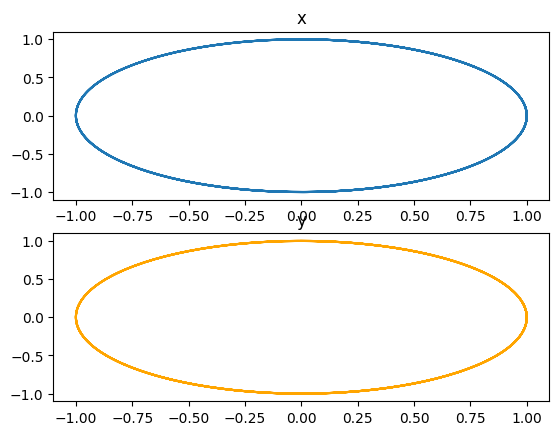

In [113]:
fig, ax = plt.subplots(2,1)             
ax[0].plot(x[:,0], x[:,1])
ax[0].set_title('x')
ax[1].plot(y[:,0], y[:,1], color = 'orange')
ax[1].set_title('y')

plt.show()                    

In [114]:
eps = optimal_epsilon(x,0.01)
eps

0.031444718225630025

In [115]:
rec_x = recurrence_matrix(x,eps)
rec_y = recurrence_matrix(y,eps)

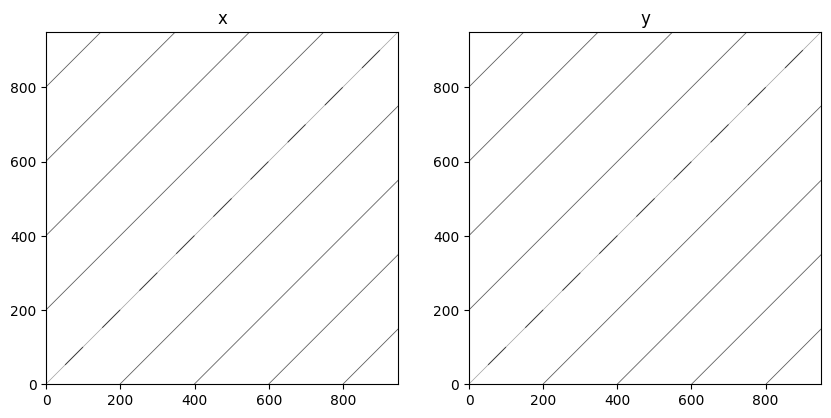

In [116]:
#Visualize
fig, axs = plt.subplots(1,2,figsize=(10, 10))

#Plot
axs[0].imshow(rec_x, origin='lower', cmap = 'binary')
axs[0].set_title('x')

axs[1].imshow(rec_y, origin='lower', cmap = 'binary')
axs[1].set_title('y')


plt.show()

# Lag Synchronization
Def:
$$
\vec{x}(t) \approx \vec{y}(t + \tau).
$$

We have 
$$
x(t) = \sin(t),
$$

$$
y(t) = \sin(t + \frac{\pi}{3}).
$$

Thus, 
$$
y(t) = x(t + \frac{\pi}{3})
$$
and we have lag synchronization.

In [117]:
#Time series
time_series_x = np.sin(np.linspace(0, 10 * np.pi, 1000))

#tau = 
time_series_y = np.sin(np.linspace(0, 10 * np.pi, 1000) + np.pi/3)

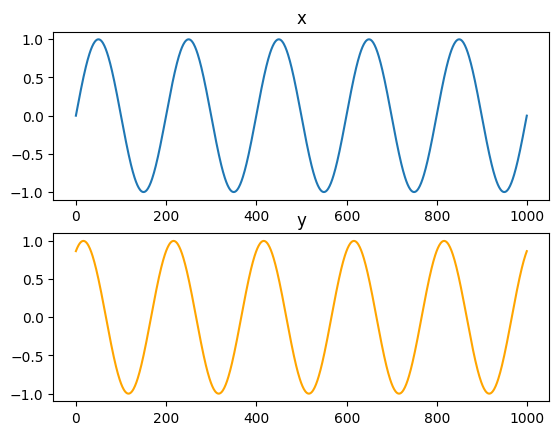

In [118]:
fig, ax = plt.subplots(2,1)             
ax[0].plot(time_series_x)
ax[0].set_title('x')
ax[1].plot(time_series_y, color = 'orange')
ax[1].set_title('y')

plt.show() 

In [119]:
x = rec.embed(time_series_x, m=2, tau=50)
y = rec.embed(time_series_y, m=2, tau=50)

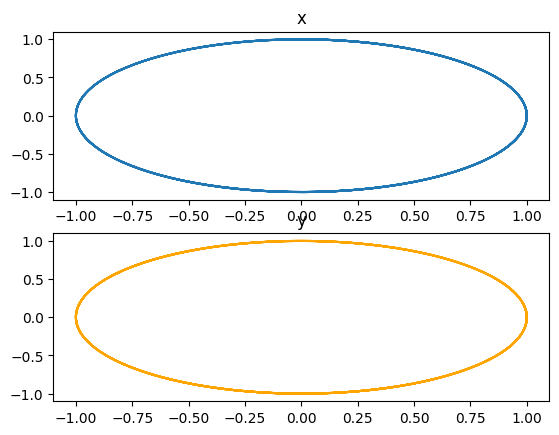

In [120]:
fig, ax = plt.subplots(2,1)             
ax[0].plot(x[:,0], x[:,1])
ax[0].set_title('x')
ax[1].plot(y[:,0], y[:,1], color = 'orange')
ax[1].set_title('y')

plt.show() 

In [121]:
eps = optimal_epsilon(x,0.01)

In [122]:
rec_x = recurrence_matrix(x,eps)
rec_y = recurrence_matrix(y,eps)

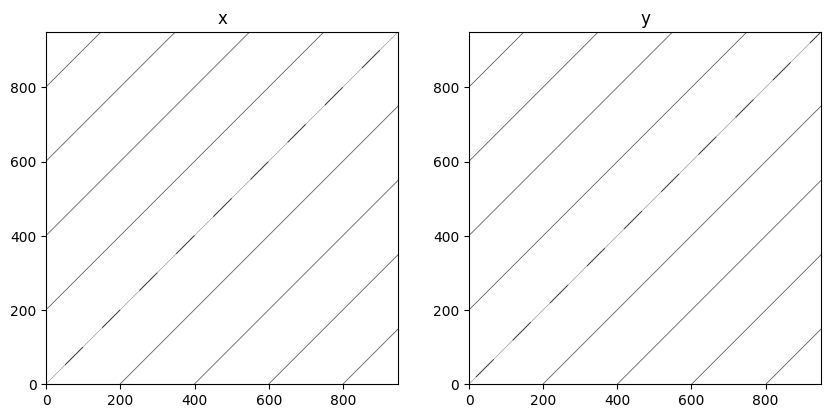

In [123]:
#Visualize
fig, axs = plt.subplots(1,2,figsize=(10, 10))

#Plot
axs[0].imshow(rec_x, origin='lower', cmap = 'binary')
axs[0].set_title('x')

axs[1].imshow(rec_y, origin='lower', cmap = 'binary')
axs[1].set_title('y')


plt.show()

No difference in recurrence plot. There shouldn't, as each time series is unchanged when compared with itself. 

What about Cross Recurrence Plots?

In [124]:
CRP_eps = CRP_optimal_epsilon(x,y,0.1)

In [125]:
CRP_rec_xy = cross_recurrence_matrix(x,y,CRP_eps)

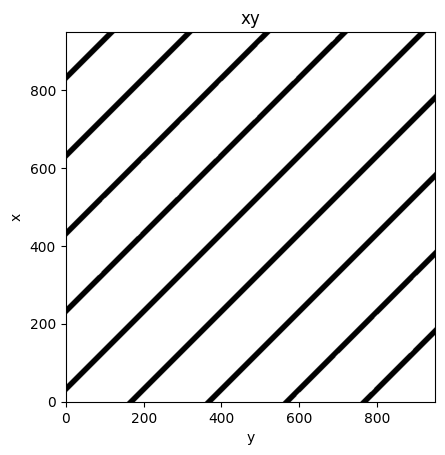

In [126]:
#Visualize
fig, axs = plt.subplots()

#Plot
axs.imshow(CRP_rec_xy, origin='lower', cmap = 'binary')

axs.set_xlabel('y')
axs.set_ylabel('x')

axs.set_title('xy')



plt.show()

The lag can be seen on both the x and y axis. 

The dynamics of each system are the same, that's why the JRP will be the same as the recurrence plots. However, the dynamics of each system in comparison to the other one is lagged, and thus we have a lagged CRP. The lag can't be seen on the JRP because it checks at the regimes and dynamics en general. When would a $JRP(\tau)$ come in handy?

What if we vary the amplitude so we only have phase synchronization?

# Phase synchronization

### No delay

In [127]:
#Time series
time_series_x = np.sin(np.linspace(0, 10 * np.pi, 1000))

#tau = 
time_series_y = 0.5*np.sin(4*np.linspace(0, 4 * np.pi, 1000)) + np.sin(np.linspace(0, 10 * np.pi, 1000))

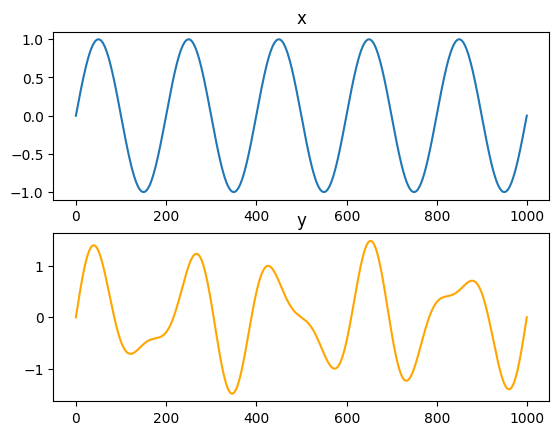

In [128]:
fig, ax = plt.subplots(2,1)             
ax[0].plot(time_series_x)
ax[0].set_title('x')
ax[1].plot(time_series_y, color = 'orange')
ax[1].set_title('y')

plt.show() 

In [129]:
x = rec.embed(time_series_x, m=2, tau=50)
y = rec.embed(time_series_y, m=2, tau=50)


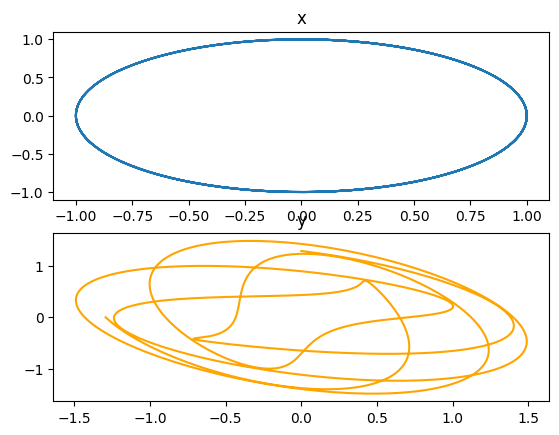

In [130]:
fig, ax = plt.subplots(2,1)             
ax[0].plot(x[:,0], x[:,1])
ax[0].set_title('x')
ax[1].plot(y[:,0], y[:,1], color = 'orange')
ax[1].set_title('y')

plt.show() 

We want to make the dynamics comparable. For this reason, we have to define two different epsilons, because the epsilon of $x$ is too small to capture the recurrences of $y$.

In [131]:
x.shape

(950, 2)

In [24]:
eps_x = optimal_epsilon(x,0.06)
eps_y = optimal_epsilon(y,0.06)

In [25]:
rec_x = recurrence_matrix(x,eps_x)
rec_y = recurrence_matrix(y,eps_y)

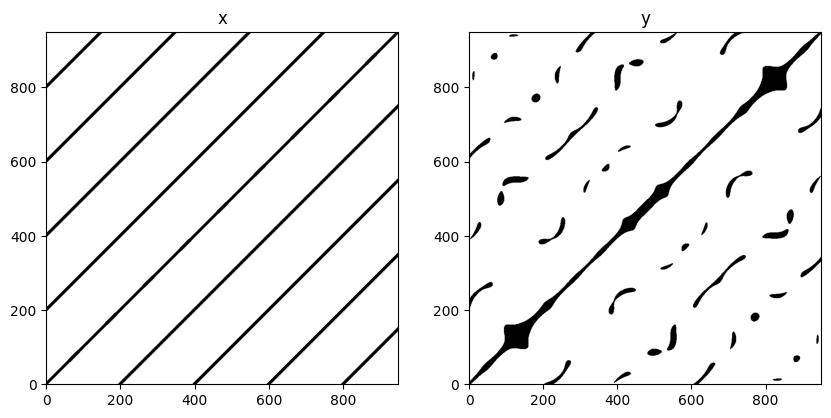

In [26]:
#Visualize
fig, axs = plt.subplots(1,2,figsize=(10, 10))

#Plot
axs[0].imshow(rec_x, origin='lower', cmap = 'binary')
axs[0].set_title('x')

axs[1].imshow(rec_y, origin='lower', cmap = 'binary')
axs[1].set_title('y')


plt.show()

Let's see how these differences reflect on the CRP and JRP.

In [27]:
CRP_eps = CRP_optimal_epsilon(x,y,0.03)

In [28]:
CRP_rec_xy = cross_recurrence_matrix(x,y,CRP_eps)

#For a later graph
non_delayed_CRP = CRP_rec_xy

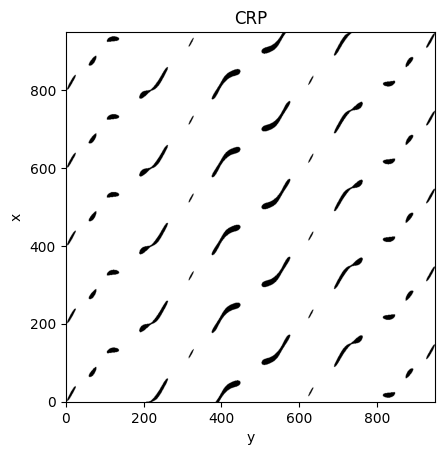

In [29]:
#Visualize
fig, axs = plt.subplots()

#Plot
axs.imshow(CRP_rec_xy, origin='lower', cmap = 'binary')

axs.set_xlabel('y')
axs.set_ylabel('x')

axs.set_title('CRP')



plt.show()

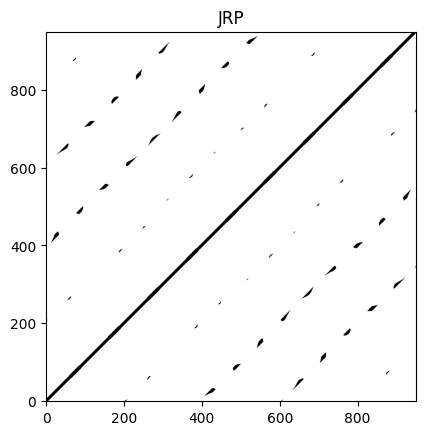

In [30]:
#Visualize
fig, axs = plt.subplots()

#Plot
axs.imshow(rec_x*rec_y, origin='lower', cmap = 'binary')
axs.set_title('JRP')


plt.show()

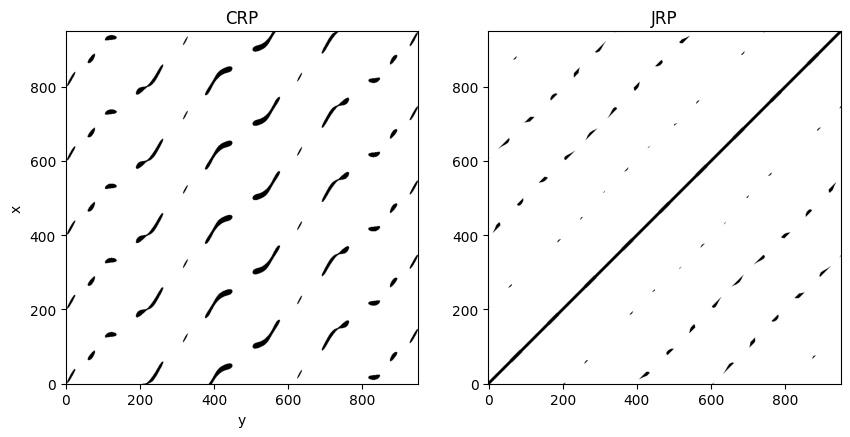

In [31]:
#Visualize
fig, axs = plt.subplots(1,2,figsize=(10, 10))

#Plot
axs[0].imshow(CRP_rec_xy, origin='lower', cmap = 'binary')

axs[0].set_xlabel('y')
axs[0].set_ylabel('x')

axs[0].set_title('CRP')

axs[1].imshow(rec_x*rec_y, origin='lower', cmap = 'binary')
axs[1].set_title('JRP')


plt.show()

### With delay

In [32]:
#Time series
time_series_x = np.sin(np.linspace(0, 10 * np.pi, 1000))

#tau = 
time_series_y = 0.5*np.sin(4*np.linspace(0, 4 * np.pi, 1000)) + np.sin(np.linspace(0, 10 * np.pi, 1000) + np.pi/3)

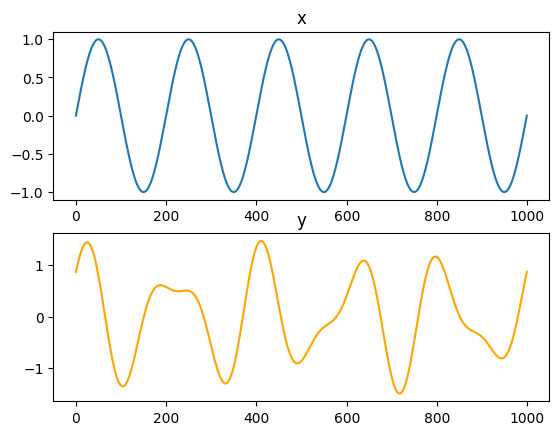

In [33]:
fig, ax = plt.subplots(2,1)             
ax[0].plot(time_series_x)
ax[0].set_title('x')
ax[1].plot(time_series_y, color = 'orange')
ax[1].set_title('y')

plt.show() 

In [34]:
x = rec.embed(time_series_x, m=2, tau=50)
y = rec.embed(time_series_y, m=2, tau=50)

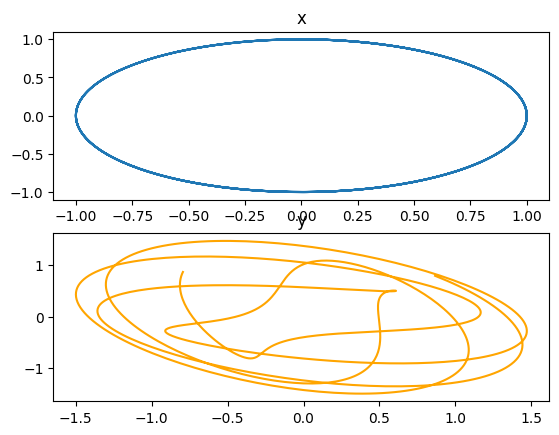

In [35]:
fig, ax = plt.subplots(2,1)             
ax[0].plot(x[:,0], x[:,1])
ax[0].set_title('x')
ax[1].plot(y[:,0], y[:,1], color = 'orange')
ax[1].set_title('y')

plt.show() 

In [36]:
eps_x = optimal_epsilon(x,0.06)
eps_y = optimal_epsilon(y,0.06)

In [37]:
rec_x = recurrence_matrix(x,eps_x)
rec_y = recurrence_matrix(y,eps_y)

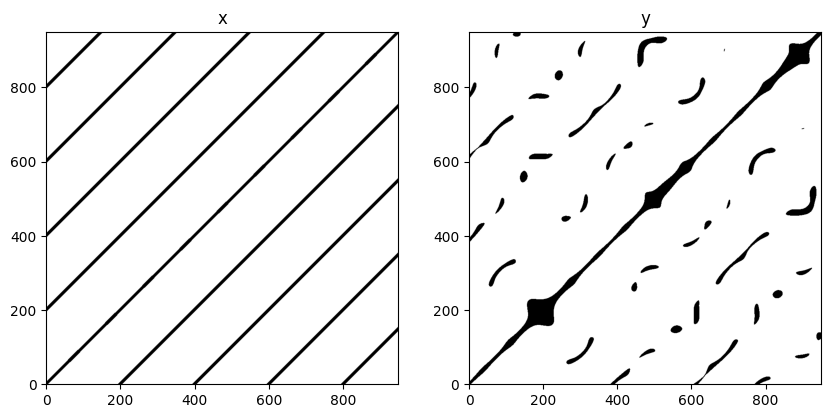

In [38]:
#Visualize
fig, axs = plt.subplots(1,2,figsize=(10, 10))

#Plot
axs[0].imshow(rec_x, origin='lower', cmap = 'binary')
axs[0].set_title('x')

axs[1].imshow(rec_y, origin='lower', cmap = 'binary')
axs[1].set_title('y')


plt.show()

As expected, individual RPs remain unchanged. Thus, the JRP will also remain unchanged. We should expect the CRP to be a delayed version of the CRP we did for the non-delayed time series.

In [39]:
CRP_eps = CRP_optimal_epsilon(x,y,0.03)

In [40]:
CRP_rec_xy = cross_recurrence_matrix(x,y,CRP_eps)

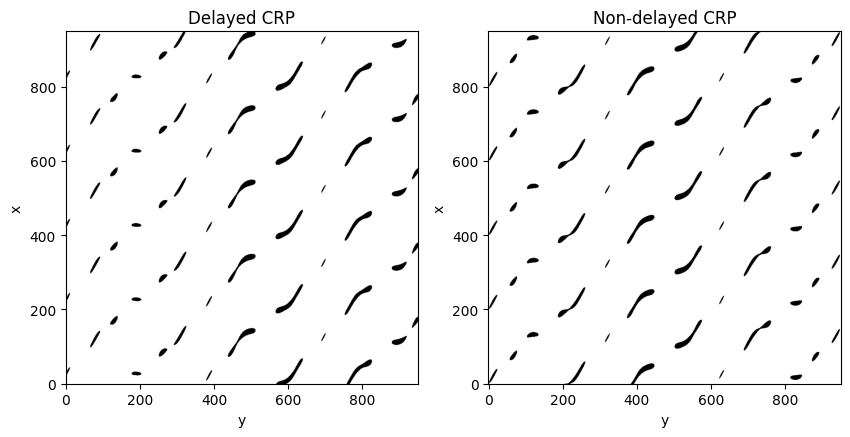

In [41]:
#Visualize
fig, axs = plt.subplots(1,2,figsize=(10, 10))

#Plot
axs[0].imshow(CRP_rec_xy, origin='lower', cmap = 'binary')

axs[0].set_xlabel('y')
axs[0].set_ylabel('x')

axs[0].set_title('Delayed CRP')

axs[1].imshow(non_delayed_CRP, origin='lower', cmap = 'binary')

axs[1].set_xlabel('y')
axs[1].set_ylabel('x')

axs[1].set_title('Non-delayed CRP')



plt.show()

The lag shows itself as a shift in the CRP. Lag synch (with similar amplitudes) has longer diagonals do to the similarity in the dynamics. Phase synchronization, however, has more interrupted diagonals because the amplitudes are not necessarily correlated. 

### Quick review of $\tau RR$

In [42]:
tau_rr_y = rec.tau_recurrence(rec_y)
tau_rr_x = rec.tau_recurrence(rec_x)

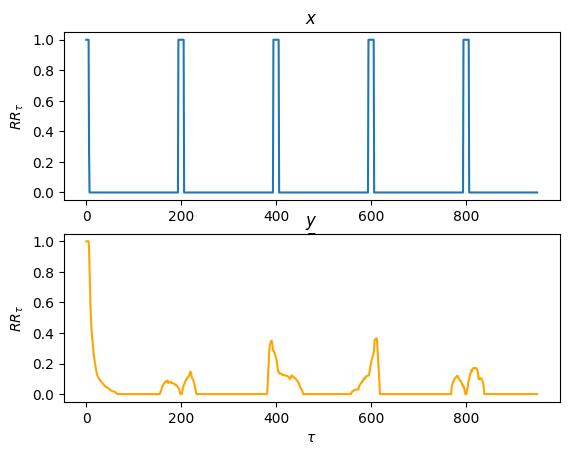

In [43]:
fig, ax = plt.subplots(2,1)   
          
ax[0].plot(np.arange(0,len(tau_rr_x),1),tau_rr_x)
ax[0].set_title(r'$x$')
ax[0].set_ylabel(r'$RR_{\tau}$')
ax[0].set_xlabel(r'$\tau$')
ax[1].plot(np.arange(0,len(tau_rr_y),1),tau_rr_y, color = 'orange')
ax[1].set_title(r'$y$')
ax[1].set_ylabel(r'$RR_{\tau}$')
ax[1].set_xlabel(r'$\tau$')

plt.show() 

In [44]:
print(rec.cpr(rec_x,rec_y))

0.27177034128618477


# Generalized synchronization

Def:
$$
\vec{x}(t) = F(\vec{y}(t)).
$$

Our system:
$$
x = \sin(t),
$$
$$
y = \cos(\sin(t)).
$$

In [45]:
#Time series
time_series_x = np.sin(np.linspace(0, 10 * np.pi, 1000))

#tau = 
time_series_y = np.cos(np.sin(np.linspace(0, 10 * np.pi, 1000)))

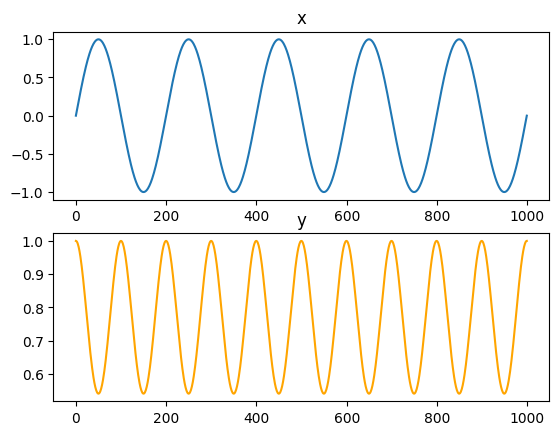

In [46]:
fig, ax = plt.subplots(2,1)             
ax[0].plot(time_series_x)
ax[0].set_title('x')
ax[1].plot(time_series_y, color = 'orange')
ax[1].set_title('y')

plt.show() 

Too trivial.

strange nonchaotic attractor with the quasiperiodically driven
logistic map

In [47]:
def x_map(x0, N):
    ts = [x0]
    
    w = (np.sqrt(5) - 1)/2

    for i in range(N-1):
        new = ts[i] + w
        ts.append(new)
    
    return np.array(ts)

def y_map(y0, a, b, x_series):
    ts = [y0]

    for i in range(len(x_series - 1)):
        new = a - (ts[i]**2)  + b*np.cos(2*np.pi*x_series[i])

        ts.append(new)

    return ts

In [48]:
#Time series
time_series_x = x_map(0,1000)

In [49]:
time_series_y = y_map(0,0.9,0.3,time_series_x)

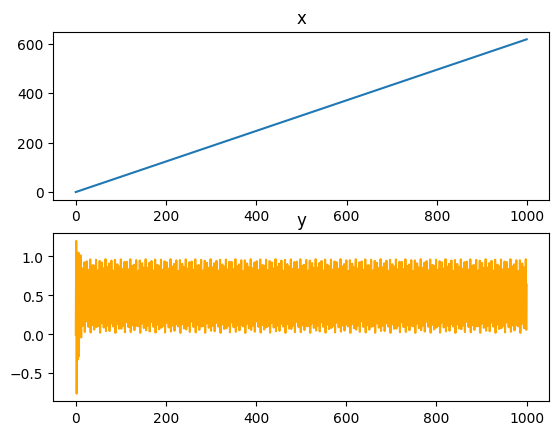

In [50]:
fig, ax = plt.subplots(2,1)             
ax[0].plot(time_series_x)
ax[0].set_title('x')
ax[1].plot(time_series_y, color = 'orange')
ax[1].set_title('y')

plt.show() 

x doesn't have an interesting time series. 

Baker's map (Synchronization by Arkady Pikovsky, Michael Rosenblum and Jürgen Kurths)

In [51]:
def x_baker(x10, x20, beta, alpha, N):
    x_values = [[x10,x20]]

    for i in range(N-1):
        if x_values[i][1] < alpha:
            new = [beta*x_values[i][0], x_values[i][1]/alpha]

            x_values.append(new)
        
        else:
            new = [beta + (1-beta)*x_values[i][0], (x_values[i][1] - alpha)/(1 - alpha)]

            x_values.append(new)
        
    return np.array(x_values)

def y_baker(y0, x, gamma):
    y_values = [y0]

    for i in range(len(x)-1):
        new = gamma*y_values[i] + np.cos(2*np.pi*x[i][0])

        y_values.append(new)

    return np.array(y_values)

Both $\alpha$ and $\beta$ are less than 1/2.

In [52]:
#Time series
time_series_x = x_baker(0.1, 0.1, 0.1, 0.2, 1000)

In [53]:
time_series_y = y_baker(0, time_series_x, 0.8)

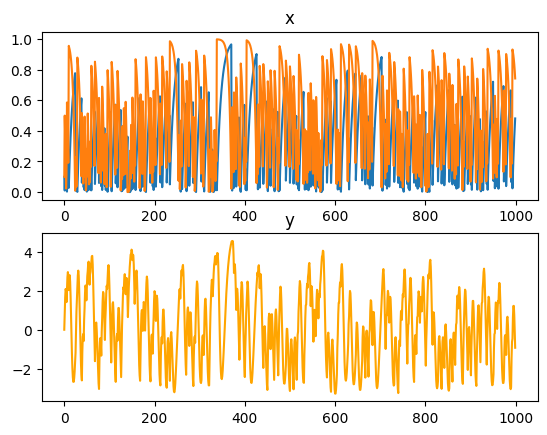

In [54]:
fig, ax = plt.subplots(2,1)             
ax[0].plot(time_series_x)
ax[0].set_title('x')
ax[1].plot(time_series_y, color = 'orange')
ax[1].set_title('y')

plt.show() 

So ugly, just what we wanted.

Let's see it in another way.

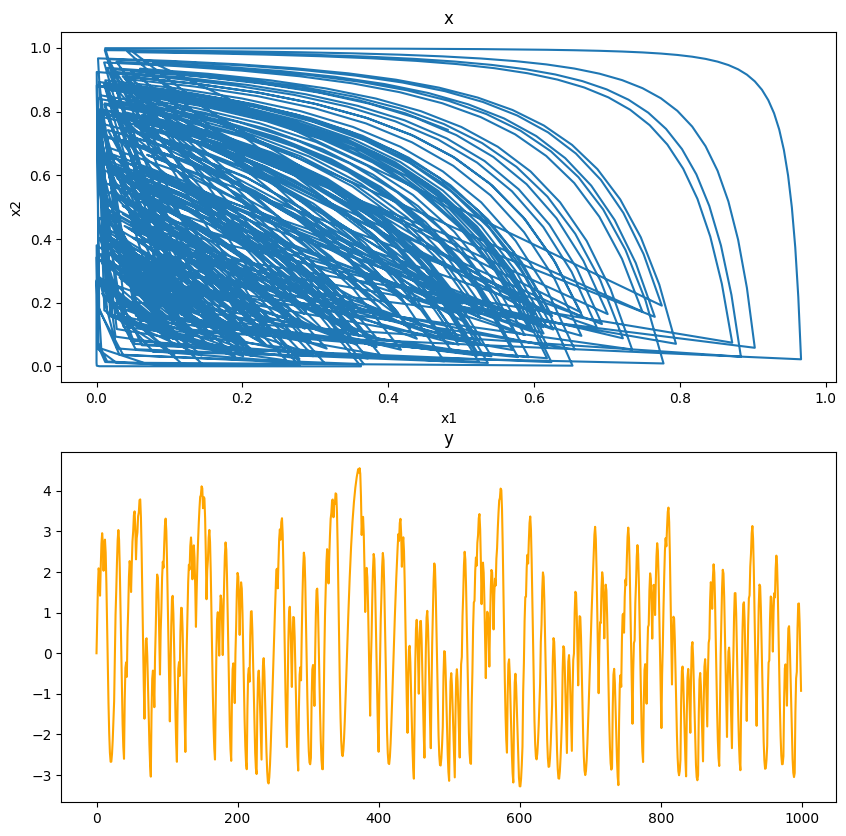

In [55]:
fig, ax = plt.subplots(2,1, figsize=(10,10))             
ax[0].plot(time_series_x.T[0],time_series_x.T[1])
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('x')
ax[1].plot(time_series_y, color = 'orange')
ax[1].set_title('y')

plt.show() 

We can see what seems to be $\vec{x}$ determining the behaviour of $y$. In some way, we could argue that the circular periods of $\vec{x}$ determine the oscillations in $y$.

To further visualize generalized synchronization, let's animate it. 

In [56]:
import matplotlib.animation as animation

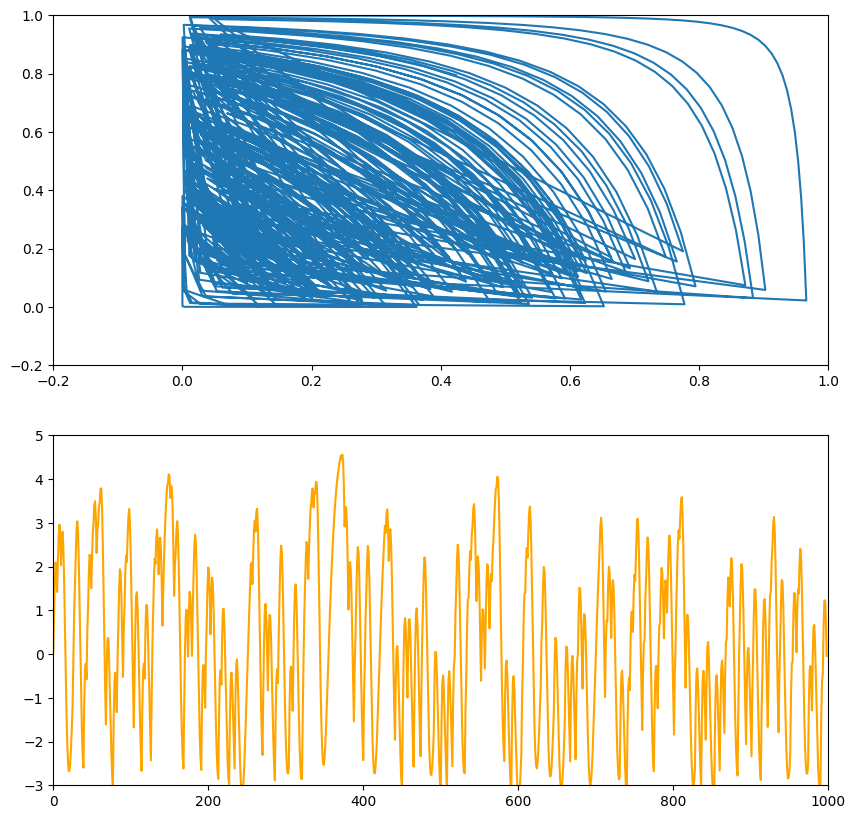

In [57]:
fig, ax = plt.subplots(2,1, figsize=(10,10))

t = np.arange(0,len(time_series_y),1)

line1 = ax[0].plot(time_series_x.T[0][0],time_series_x.T[1][0])[0]
line2 = ax[1].plot(t[0], time_series_y[0], color = 'orange')[0]
#ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
#ax.legend()
ax[0].set(xlim=[-0.2, 1], ylim=[-0.2, 1])
ax[1].set(xlim=[0, 1000], ylim=[-3, 5])



def update(frame):
    # update the line plots:
    line1.set_xdata(time_series_x.T[0][:frame])
    line1.set_ydata(time_series_x.T[1][:frame])

    line2.set_xdata(t[:frame])
    line2.set_ydata(time_series_y[:frame])
    return (line1, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=len(t), interval=100)
ani.save('vid.mp4')
plt.show()

The animation helps us to see that bigger circles lead to oscillations with bigger amplitude. Also, the frequency of the oscillation seems to be correlated with the frequency at which the circle is drawn. This shows visually how a generalized synchronization looks like. 

In [58]:
eps_x = optimal_epsilon(time_series_x,0.06)
eps_y = optimal_epsilon(time_series_y,0.06)

In [59]:
rec_x = recurrence_matrix(time_series_x,eps_x)
rec_y = recurrence_matrix(time_series_y,eps_y)

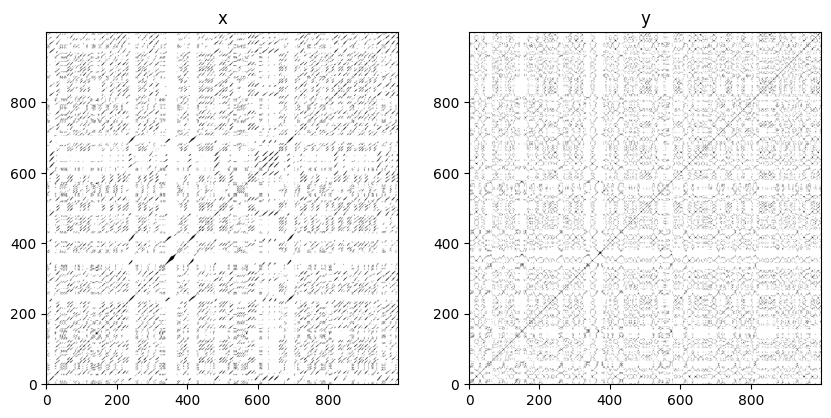

In [60]:
#Visualize
fig, axs = plt.subplots(1,2,figsize=(10, 10))

#Plot
axs[0].imshow(rec_x, origin='lower', cmap = 'binary')
axs[0].set_title('x')

axs[1].imshow(rec_y, origin='lower', cmap = 'binary')
axs[1].set_title('y')


plt.show()

Let's try embedding y

In [61]:
time_series_y = rec.embed(time_series_y, m=2, tau=50)

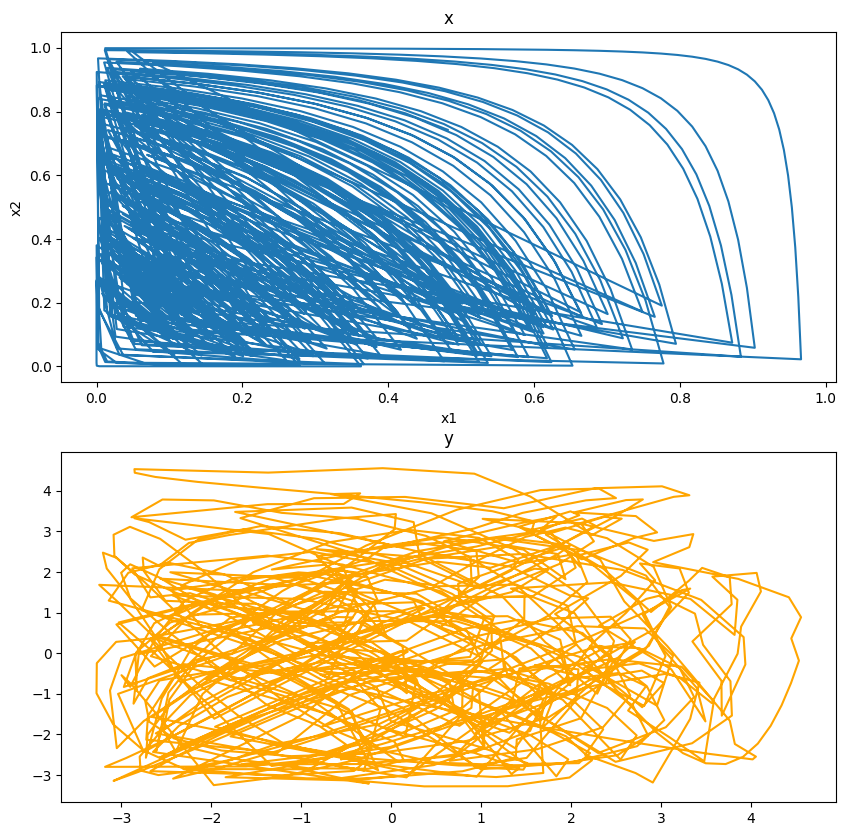

In [62]:
fig, ax = plt.subplots(2,1, figsize=(10,10))             
ax[0].plot(time_series_x.T[0],time_series_x.T[1])
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('x')
ax[1].plot(time_series_y.T[0],time_series_y.T[1], color = 'orange')
ax[1].set_title('y')

plt.show() 

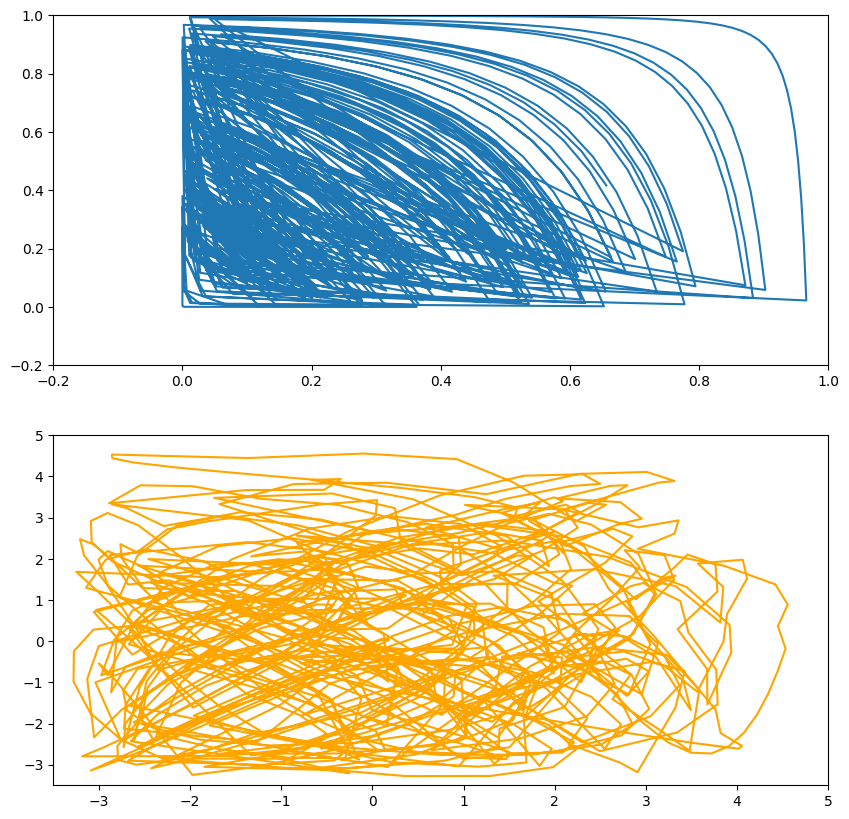

In [63]:
fig, ax = plt.subplots(2,1, figsize=(10,10))

t = np.arange(0,len(time_series_y),1)

line1 = ax[0].plot(time_series_x.T[0][0],time_series_x.T[1][0])[0]
line2 = ax[1].plot(time_series_y.T[0][0],time_series_y.T[1][0], color = 'orange')[0]
#ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
#ax.legend()
ax[0].set(xlim=[-0.2, 1], ylim=[-0.2, 1])
ax[1].set(xlim=[-3.5, 5], ylim=[-3.5, 5])



def update(frame):
    # update the line plots:
    line1.set_xdata(time_series_x.T[0][:frame])
    line1.set_ydata(time_series_x.T[1][:frame])

    line2.set_xdata(time_series_y.T[0][:frame])
    line2.set_ydata(time_series_y.T[1][:frame])
    return (line1, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=len(t), interval=100)
ani.save('vidCRP.mp4')
plt.show()

In [64]:
eps_y = optimal_epsilon(time_series_y,0.10)
rec_y = recurrence_matrix(time_series_y,eps_y)

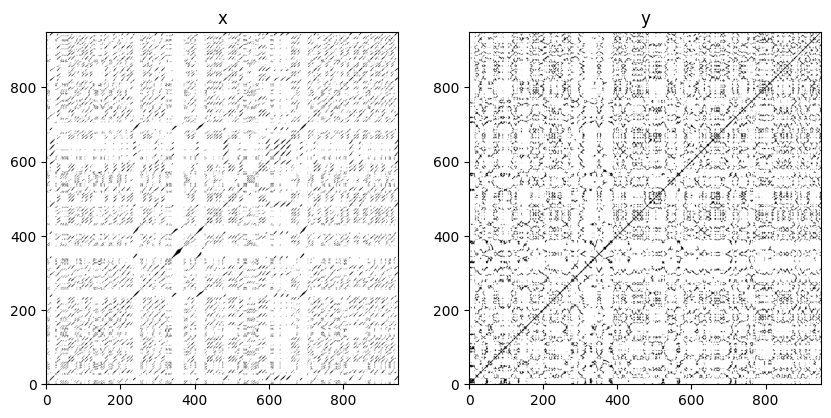

In [65]:

#Visualize
fig, axs = plt.subplots(1,2,figsize=(10, 10))

#Plot
axs[0].imshow(rec_x[:len(time_series_y),:len(time_series_y)], origin='lower', cmap = 'binary')
axs[0].set_title('x')

axs[1].imshow(rec_y, origin='lower', cmap = 'binary')
axs[1].set_title('y')


plt.show()


We lose a lot of info, let's keep the original 1-dim version.

How do we create a CRP between two ts with different dims? How do we define the distnace between the points?

We try embedding $y$ so that it has 2 dimensions.

In [66]:
CRP_eps = CRP_optimal_epsilon(time_series_x[:len(time_series_y)],time_series_y,0.03)

In [67]:
CRP_rec_xy = cross_recurrence_matrix(time_series_x[:len(time_series_y)],time_series_y,CRP_eps)

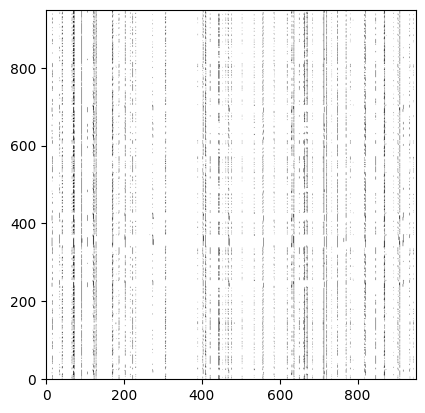

In [68]:
fig, axs = plt.subplots()

#Plot
axs.imshow(CRP_rec_xy, origin='lower', cmap = 'binary')

plt.show()

How do we interpret vertical lines? For a given state in $y$, all the states of $x$ occurred simultaneously? Could it mean a point were $y$ was fixed and $x$ passed through it multiple times?

For now, let's evaluate the JRP.

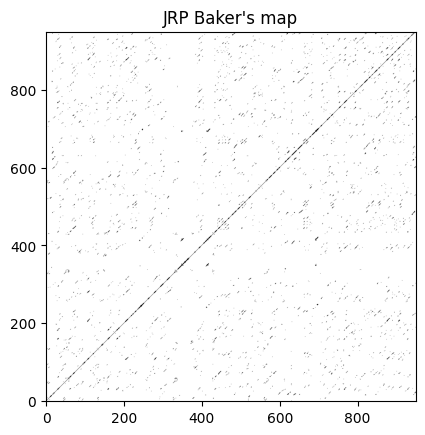

In [69]:
#Visualize
fig, axs = plt.subplots()

#Plot
axs.imshow(rec_x[:len(time_series_y),:len(time_series_y)]*rec_y, origin='lower', cmap = 'binary')
axs.set_title("JRP Baker's map")


plt.show()

The JRP is not very telling of the presence of GS. Both with and without embeddding, what it shows is similar. Despite having analytically GS, the systems seem to not have recurrences at the same time. One possible option would be to looked at a lagged recurrence plot ($JRP(\tau)$). Maybe the GS has a lag.

Let's see if there is a kind of lagged GS with $S(\tau)$. We'll fix the length of the $\vec{x}$ time series to 1000.

In [70]:
#Time series
time_series_x = x_baker(0.1, 0.1, 0.1, 0.2, 1100)

In [71]:
lagged_time_series_y = [y_baker(0, time_series_x[i:len(time_series_x)-100+i], 0.8) for i in range(100)]

In [72]:
eps_x = optimal_epsilon(time_series_x[:1000],0.06)
rec_x = recurrence_matrix(time_series_x[:1000],eps_x)

In [73]:
s_tau = []

for i in range(100):
    actual_y = lagged_time_series_y[i]
    
    eps_y = optimal_epsilon(actual_y,0.06) 

    rec_y = recurrence_matrix(actual_y,eps_y)

    jrp = rec_x*rec_y

    N = len(actual_y)


    s_tau.append((np.sum(jrp)/(N**2))/0.06)

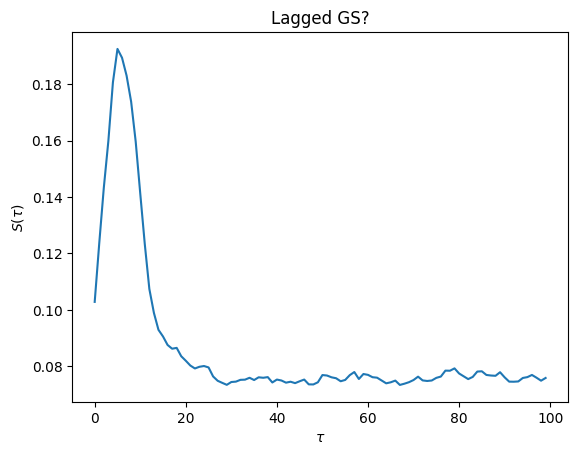

In [74]:
fig, ax = plt.subplots()             
ax.plot(np.arange(0,len(s_tau),1), s_tau)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$S(\tau)$')
ax.set_title('Lagged GS?')

plt.show() 

There seems to be a lagged GS. Let's see how it looks in the JRP.

In [75]:
#Select lagged ts
max_tau = np.where(s_tau == np.max(s_tau))[0][0]

max_lagged_yts = lagged_time_series_y[max_tau]

In [76]:
eps_y = optimal_epsilon(max_lagged_yts,0.06) 

rec_y = recurrence_matrix(max_lagged_yts,eps_y)

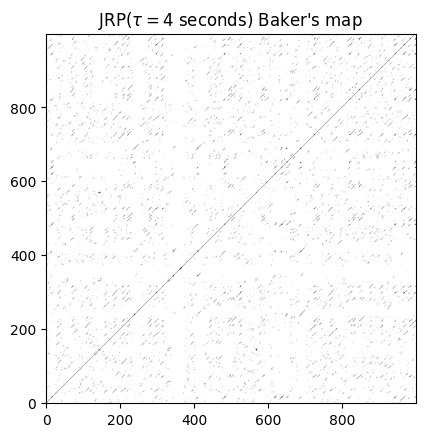

In [77]:
#Visualize
fig, axs = plt.subplots()

#Plot
axs.imshow(rec_x*rec_y, origin='lower', cmap = 'binary')
axs.set_title(r"JRP($\tau = 4$ seconds) Baker's map ")


plt.show()

Even though the model is supposed to show GS, when we look at the $S(\tau)$ graph, there's no apparent GS. This is further confirmed by the $JRP(\tau)$. Nevertheless, the animations did show that there was some kind of dependence.

Something to explore...

In [78]:
#Time series
time_series_x = x_baker(0.1, 0.1, 0.1, 0.2, 500)

In [79]:
time_series_x.shape

(500, 2)

In [80]:
time_series_y = y_baker(0, time_series_x, 0.8)

In [81]:
#Select only x1, bcs that's what y is coupled to
time_series_x = time_series_x.T[0]

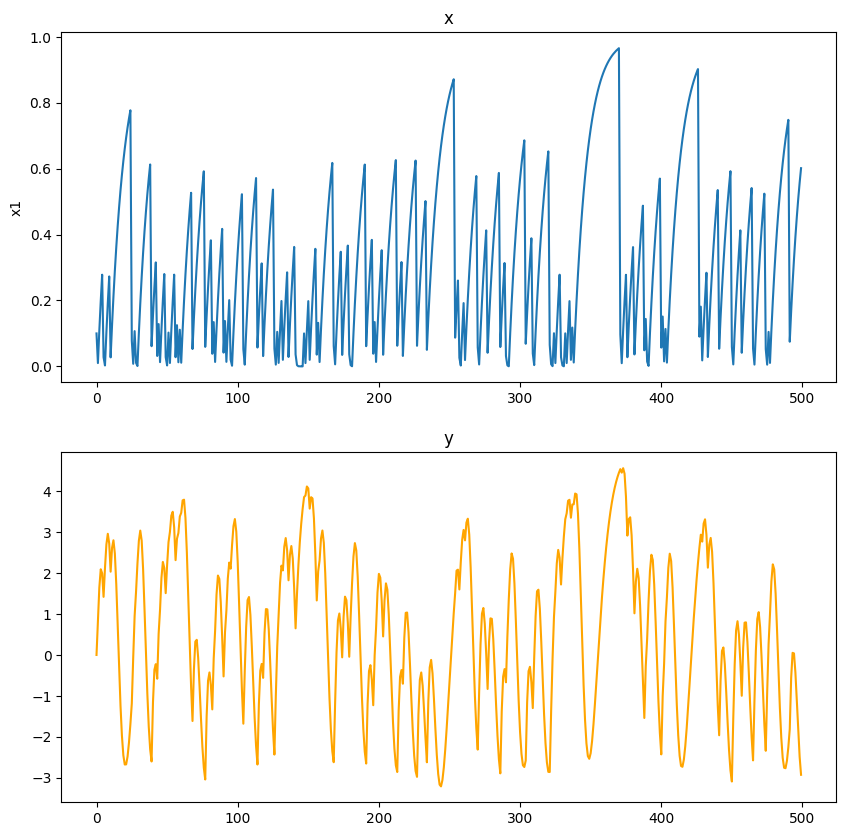

In [82]:
fig, ax = plt.subplots(2,1, figsize=(10,10))             
ax[0].plot(time_series_x)
ax[0].set_ylabel('x1')
ax[0].set_title('x')
ax[1].plot(time_series_y, color = 'orange')
ax[1].set_title('y')

plt.show() 

In [83]:
eps_x = optimal_epsilon(time_series_x,0.06)
eps_y = optimal_epsilon(time_series_y,0.06)

In [84]:
rec_x = recurrence_matrix(time_series_x,eps_x)
rec_y = recurrence_matrix(time_series_y,eps_y)

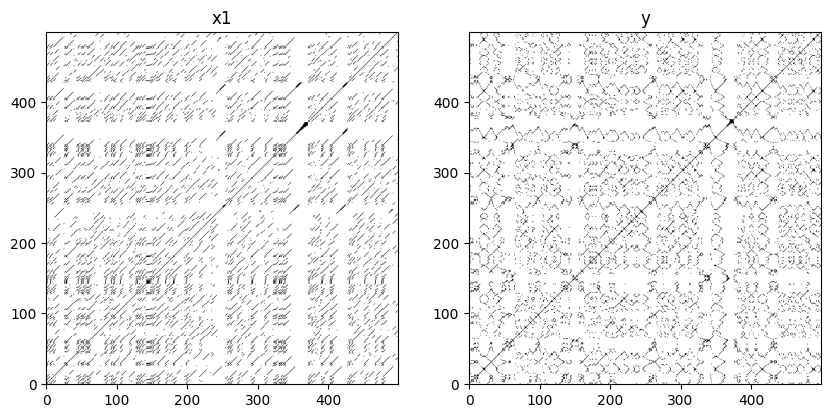

In [85]:
#Visualize
fig, axs = plt.subplots(1,2,figsize=(10, 10))

#Plot
axs[0].imshow(rec_x, origin='lower', cmap = 'binary')
axs[0].set_title('x1')

axs[1].imshow(rec_y, origin='lower', cmap = 'binary')
axs[1].set_title('y')


plt.show()

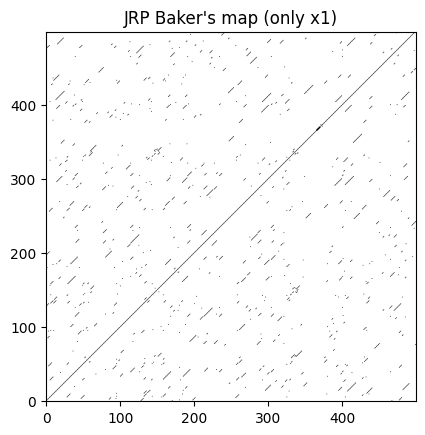

In [86]:
#Visualize
fig, axs = plt.subplots()

#Plot
axs.imshow(rec_x*rec_y, origin='lower', cmap = 'binary')
axs.set_title("JRP Baker's map (only x1)")


plt.show()

In [87]:
#Time series
time_series_x = x_baker(0.1, 0.1, 0.1, 0.2, 500)

In [88]:
lagged_time_series_y = [y_baker(0, time_series_x[i:len(time_series_x)-100+i], 0.8) for i in range(100)]

In [89]:
time_series_x = time_series_x.T[0]

In [90]:
eps_x = optimal_epsilon(time_series_x[:400],0.06)
rec_x = recurrence_matrix(time_series_x[:400],eps_x)

In [91]:
s_tau = []

for i in range(100):
    actual_y = lagged_time_series_y[i]
    
    eps_y = optimal_epsilon(actual_y,0.06) 

    rec_y = recurrence_matrix(actual_y,eps_y)

    jrp = rec_x*rec_y

    N = len(actual_y)


    s_tau.append((np.sum(jrp)/(N**2))/0.06)

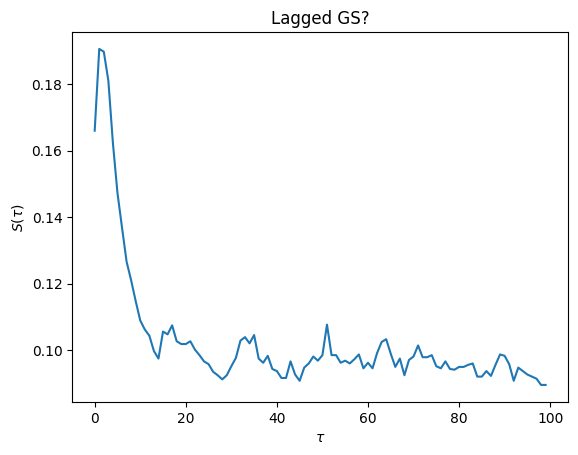

In [92]:
fig, ax = plt.subplots()             
ax.plot(np.arange(0,len(s_tau),1), s_tau)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$S(\tau)$')
ax.set_title('Lagged GS?')

plt.show() 

Not a considerable increase in $S(\tau)$ when considering only the $x_1$ component. 

When using FAN.

In [93]:
#Time series
time_series_x = x_baker(0.1, 0.1, 0.1, 0.2, 500)
time_series_y = y_baker(0, time_series_x, 0.8)


In [94]:
rec_x = recurrence_matrix_fan(time_series_x,0.06)
rec_y = recurrence_matrix_fan(time_series_y,0.06)

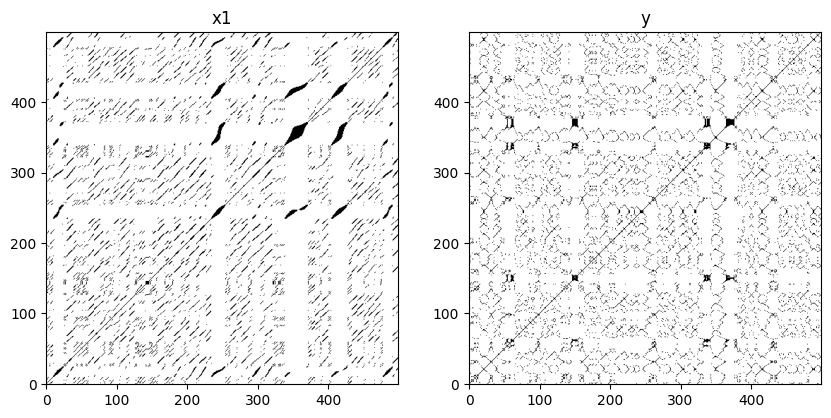

In [95]:
#Visualize
fig, axs = plt.subplots(1,2,figsize=(10, 10))

#Plot
axs[0].imshow(rec_x, origin='lower', cmap = 'binary')
axs[0].set_title('x1')

axs[1].imshow(rec_y, origin='lower', cmap = 'binary')
axs[1].set_title('y')


plt.show()

In [96]:
lagged_time_series_y = [y_baker(0, time_series_x[i:len(time_series_x)-100+i], 0.8) for i in range(100)]

In [97]:
rec_x = recurrence_matrix_fan(time_series_x[:400],0.06)

In [98]:
s_tau = []

for i in range(100):
    actual_y = lagged_time_series_y[i]

    rec_y = recurrence_matrix_fan(actual_y,0.06)

    jrp = rec_x*rec_y

    N = len(actual_y)


    s_tau.append((np.sum(jrp)/(N**2))/0.06)

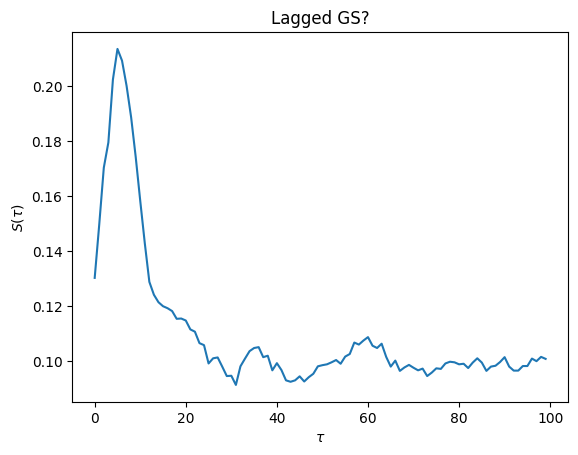

In [99]:
fig, ax = plt.subplots()             
ax.plot(np.arange(0,len(s_tau),1), s_tau)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$S(\tau)$')
ax.set_title('Lagged GS?')

plt.show() 

Now only considering the x component.

In [100]:
time_series_x = time_series_x.T[0]

In [101]:
rec_x = recurrence_matrix_fan(time_series_x[:400],0.06)

In [102]:
s_tau = []

for i in range(100):
    actual_y = lagged_time_series_y[i]

    rec_y = recurrence_matrix_fan(actual_y,0.06)

    jrp = rec_x*rec_y

    N = len(actual_y)


    s_tau.append((np.sum(jrp)/(N**2))/0.06)

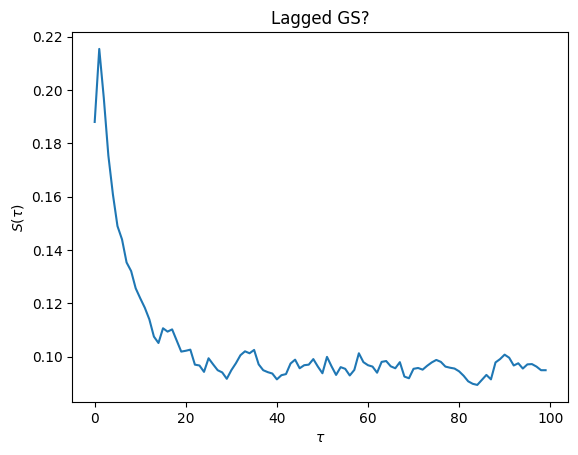

In [103]:
fig, ax = plt.subplots()             
ax.plot(np.arange(0,len(s_tau),1), s_tau)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$S(\tau)$')
ax.set_title('Lagged GS?')

plt.show() 

We see an increase in the $S(\tau)$ when using FAN instead of a fixed $\epsilon$. *Why?* Still, not high enough to conclude GS. 

In [104]:
#Select lagged ts
max_tau = np.where(s_tau == np.max(s_tau))[0][0]

max_lagged_yts = lagged_time_series_y[max_tau]

Varying $\gamma$ in $y$.

In [105]:
#Time series
time_series_x = x_baker(0.1, 0.1, 0.1, 0.2, 500)

In [106]:
lagged_time_series_y = [y_baker(0, time_series_x[i:len(time_series_x)-100+i], 0) for i in range(100)]

In [107]:
rec_x = recurrence_matrix_fan(time_series_x[:400],0.06)

In [108]:
s_tau = []

for i in range(100):
    actual_y = lagged_time_series_y[i]

    rec_y = recurrence_matrix_fan(actual_y,0.06)

    jrp = rec_x*rec_y

    N = len(actual_y)


    s_tau.append((np.sum(jrp)/(N**2))/0.06)

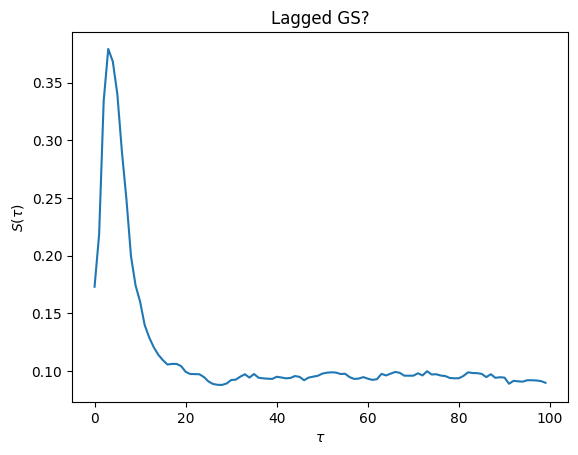

In [109]:
fig, ax = plt.subplots()             
ax.plot(np.arange(0,len(s_tau),1), s_tau)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$S(\tau)$')
ax.set_title('Lagged GS?')

plt.show() 

Not even with $\gamma = 0$ do we get significant GS.